<a href="https://colab.research.google.com/github/Hk05101/CardioRakshak/blob/main/CardioRakshak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.apply(lambda x:len(x.unique()))

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [7]:
print('cp ',df['cp'].unique())
print('fbs ',df['fbs'].unique())
print('restecg ',df['restecg'].unique())
print('exang ',df['exang'].unique())
print('slope ',df['slope'].unique())
print('ca ',df['ca'].unique())
print('thal ',df['thal'].unique())

cp  [3 2 1 0]
fbs  [1 0]
restecg  [0 1 2]
exang  [0 1]
slope  [0 2 1]
ca  [0 2 1 3 4]
thal  [1 2 3 0]


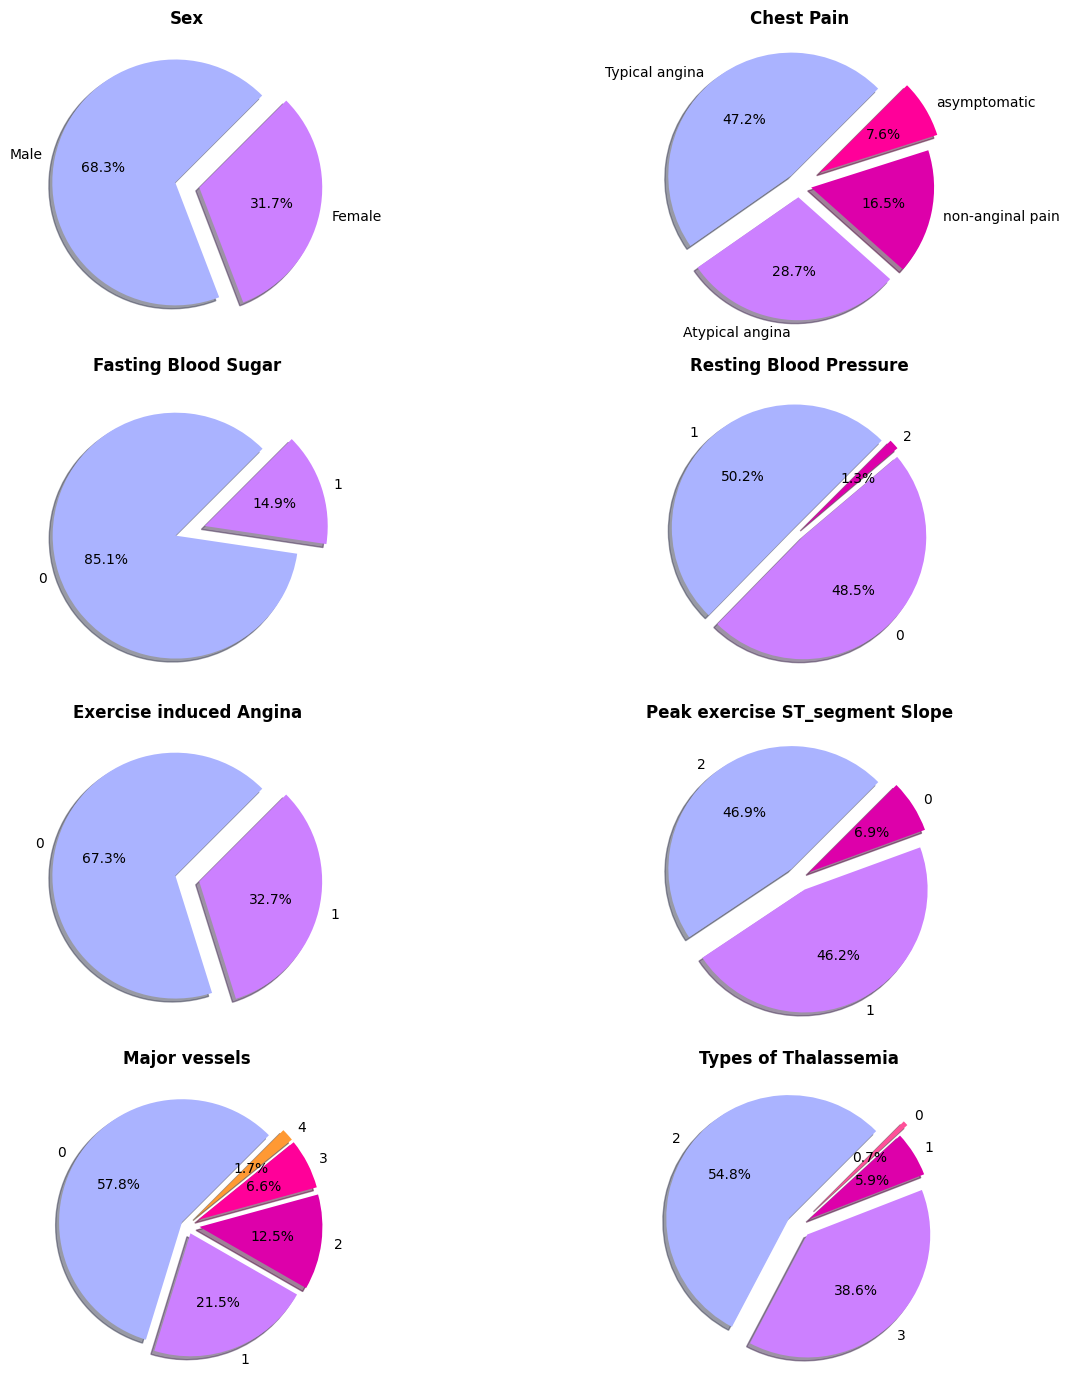

In [8]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1,0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099','#FF9933'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.2],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF5099'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.savefig("PiePlots.png")
plt.show()


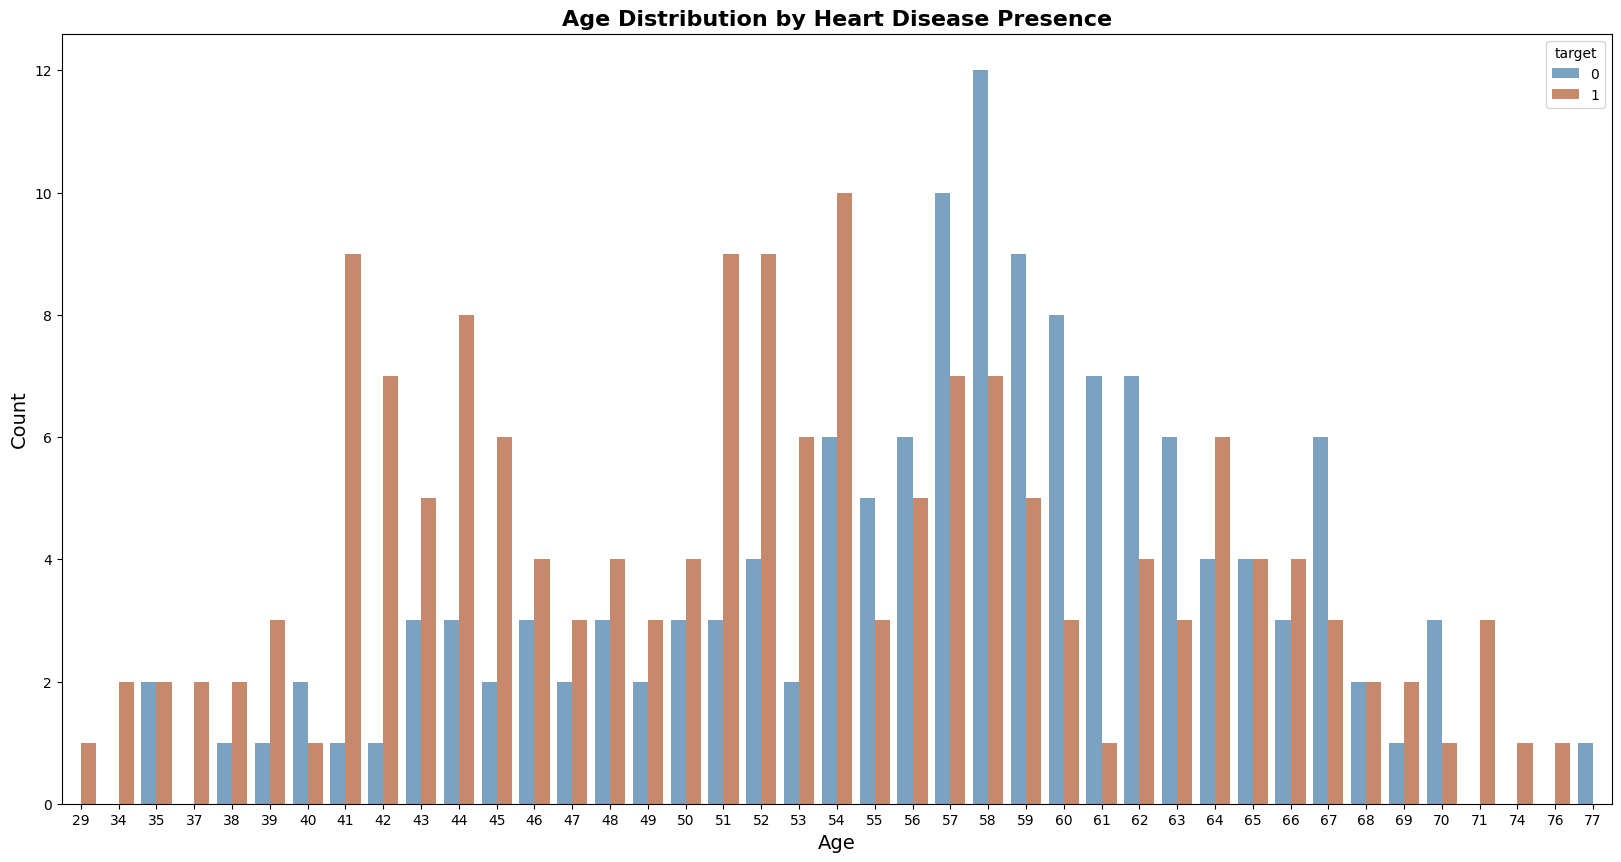

In [9]:
plt.figure(figsize=(20, 10))

sns.countplot(x='age', data=df, hue='target', palette="twilight_shifted", saturation=2, dodge=True)

plt.title("Age Distribution by Heart Disease Presence", fontsize=16, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.savefig("Target&age.png")
plt.show()

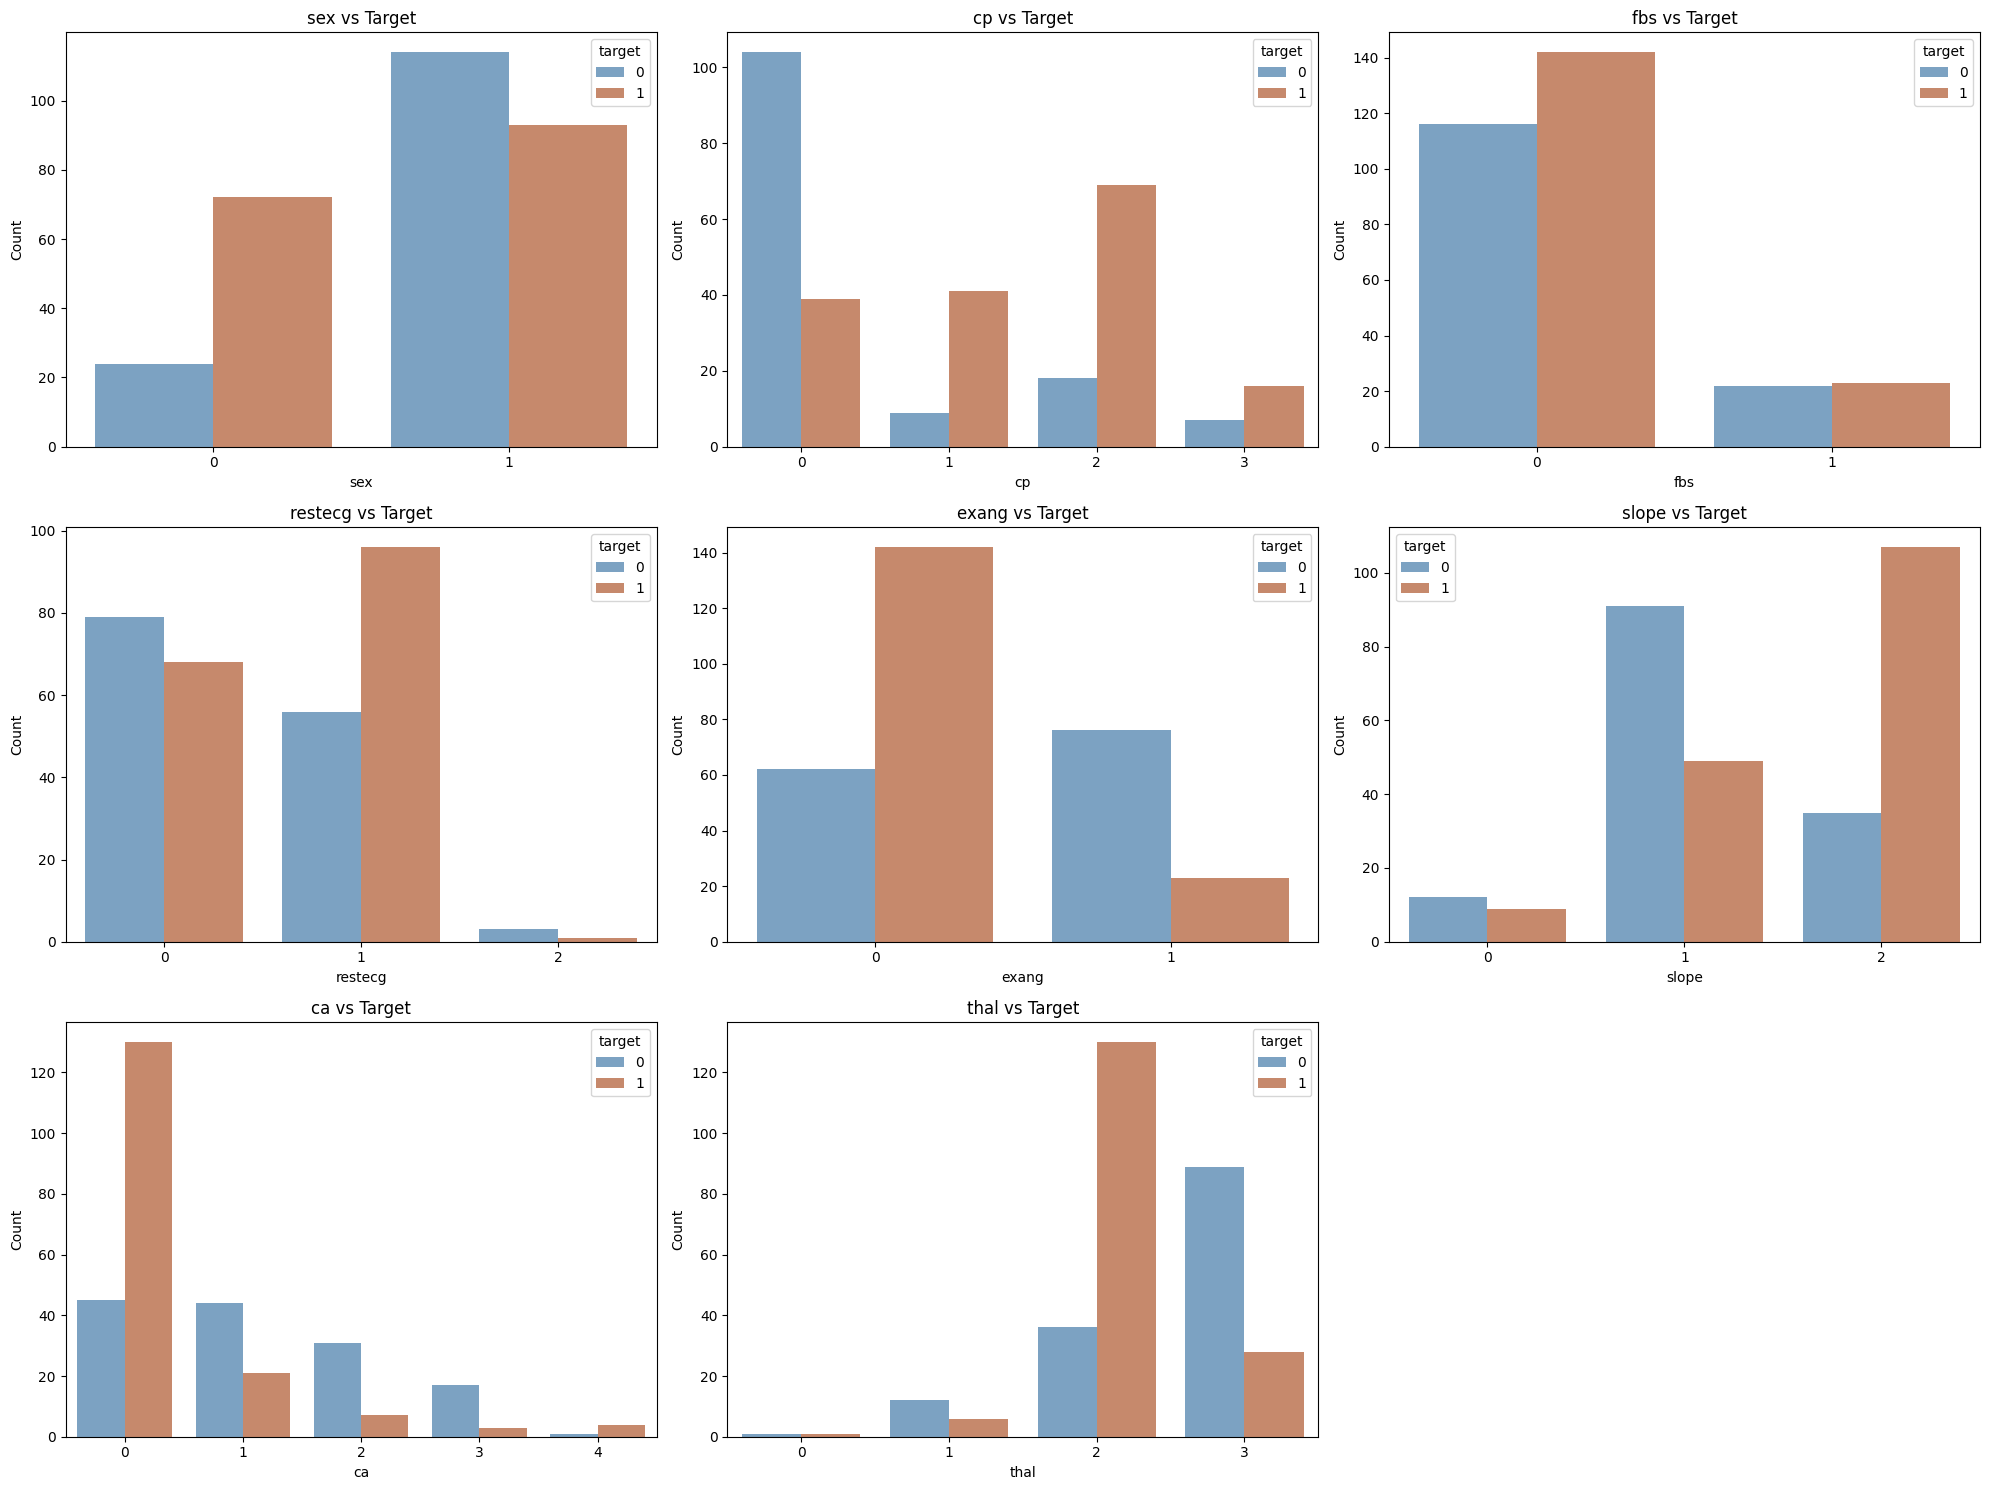

In [10]:
feature_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(20, 15))
for idx, feature in enumerate(feature_list, start=1):
    plt.subplot(3, 3, idx)
    sns.countplot(x=feature, data=df, hue='target', palette="twilight_shifted",
                  saturation=2, dodge=True)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.savefig("TargetRelation.png")
plt.show()

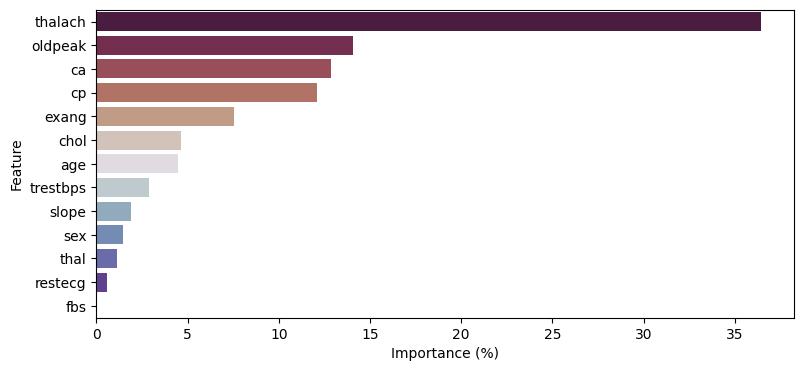

In [11]:
X = df.drop('target',axis=1)
Y = df['target']
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, Y)
per = []
for i in fs.scores_:
    per.append(round(((i/sum(fs.scores_))*100),3))

features_data = pd.DataFrame({'Feature':X.columns,'Scores':fs.scores_,'Importance (%)':per}).sort_values(by=['Scores'],ascending=False)

plt.figure(figsize=(9,4))
sns.barplot( x='Importance (%)',y='Feature',orient='h',data=features_data,palette='twilight_shifted_r')
insignificant = features_data.loc[features_data['Importance (%)']<0.005]['Feature'].unique()
features_data = features_data.set_index('Feature')
features_data
plt.savefig("FeatureImportance.png")

MODELLING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier, AdaBoostRegressor, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, roc_auc_score, recall_score
from sklearn.metrics import RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

In [13]:
X = df.drop('target',axis=1).values
Y = df['target'].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


1: LOGISTIC REGRESSION


In [16]:
LL = LogisticRegression(solver='liblinear', max_iter=1000, random_state=31)
LL.fit(X_train, Y_train)
y_pred_lr = LL.predict(X_test)

In [17]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)
score_lr

85.25

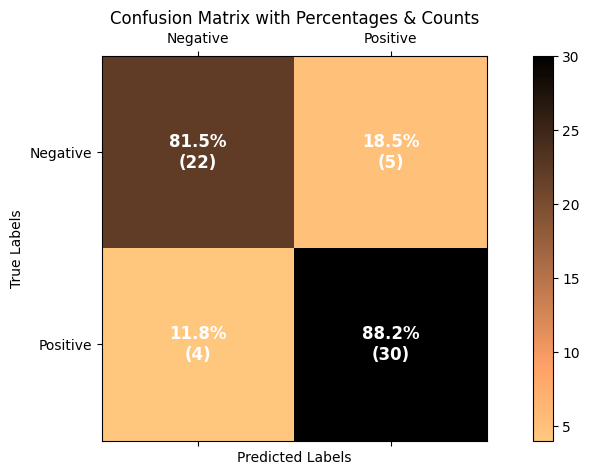

In [18]:
# Compute raw confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, y_pred_lr)

# Compute normalized version (percentages)
conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

# Plot raw matrix but annotate with percentages
def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Add text annotations with percentages
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix with Percentages & Counts')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Call the function
plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="LRcrr.png")


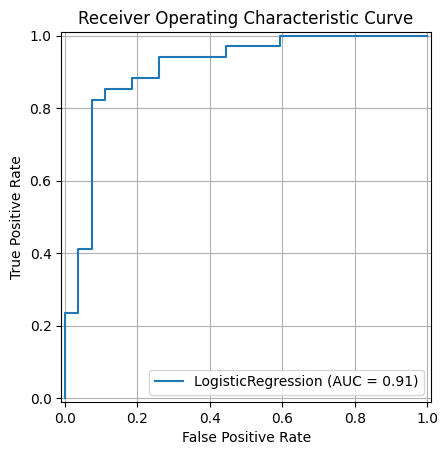

In [19]:
roc_display = RocCurveDisplay.from_estimator(LL, X_test, Y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("LR.png")
plt.show()

In [20]:
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



2: KNN- CLF

In [21]:
kclf = KNeighborsClassifier(n_neighbors=31,leaf_size=30)
kclf.fit(X_train,Y_train)
Y_pred_kclf = kclf.predict(X_test)
score_kclf = round(accuracy_score(Y_pred_kclf,Y_test)*100,2)
score_kclf

68.85

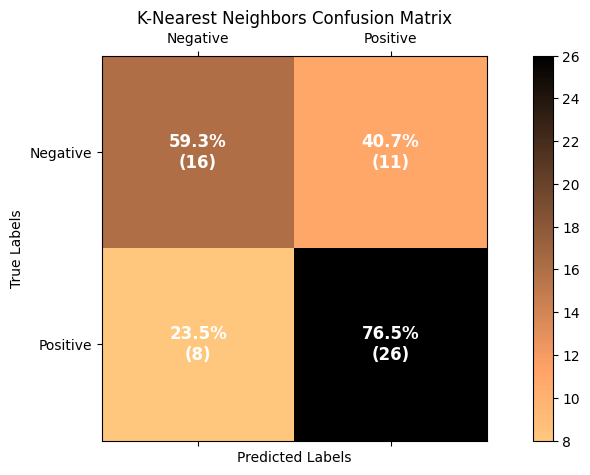

In [22]:
# Compute the raw confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred_kclf)

# Normalize it to get percentages
conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

# Function to plot annotated confusion matrix
def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both % and raw count
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('K-Nearest Neighbors Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Call the function and save the KNN confusion matrix plot
plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="KNNcrr.png")


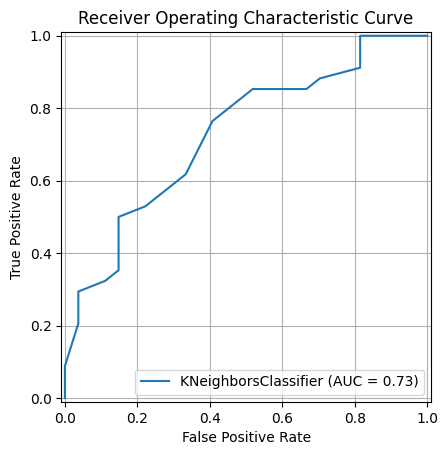

In [23]:
RocCurveDisplay.from_estimator(kclf, X_test, Y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("KNN.png")
plt.show()


In [24]:
print(metrics.classification_report(Y_test,Y_pred_kclf))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        27
           1       0.70      0.76      0.73        34

    accuracy                           0.69        61
   macro avg       0.68      0.68      0.68        61
weighted avg       0.69      0.69      0.69        61



3: SVM

In [25]:
svm = SVC(C=8.0,kernel='rbf',degree=3,gamma='scale',coef0=0.01,shrinking=True,probability=True,tol=0.1,cache_size=300,class_weight=None,verbose=False,max_iter=-1,
          decision_function_shape='ovo')
svm.fit(X_train,Y_train)
Y_pred_svm = svm.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
score_svm

70.49

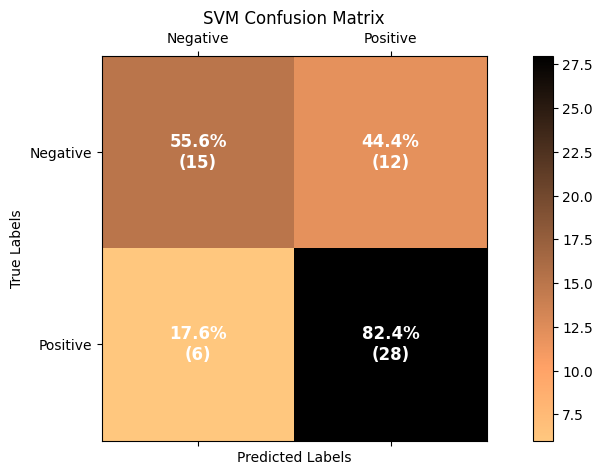

In [26]:
# Compute confusion matrix for SVM
conf_mat = confusion_matrix(Y_test, Y_pred_svm)

# Normalize for percentage annotations
conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

# Confusion matrix plotting function
def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both count and percentage
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('SVM Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Plot and save the SVM confusion matrix
plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="SVCcrr.png")


In [27]:
Y_pred_svm = np.around(Y_pred_svm)
print(metrics.classification_report(Y_test,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.56      0.62        27
           1       0.70      0.82      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.70        61



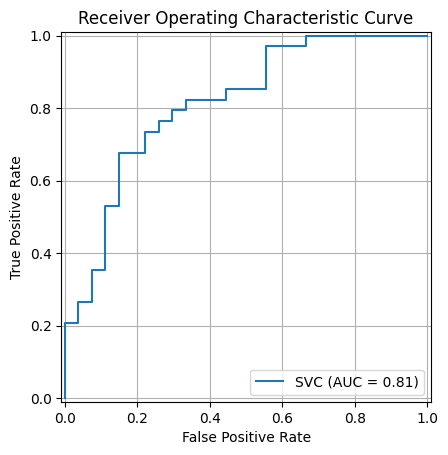

In [28]:

RocCurveDisplay.from_estimator(svm, X_test, Y_test)

# Customize and save the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("SVC.png")
plt.show()


4: Naive Bayes

In [29]:
gnb = GaussianNB(var_smoothing=1e-50)
gnb.fit(X_train,Y_train)
gnb.predict(X_test)
Y_pred_gnb = gnb.predict(X_test)
score_gnb = round(accuracy_score(Y_pred_gnb,Y_test)*100,2)
score_gnb

85.25

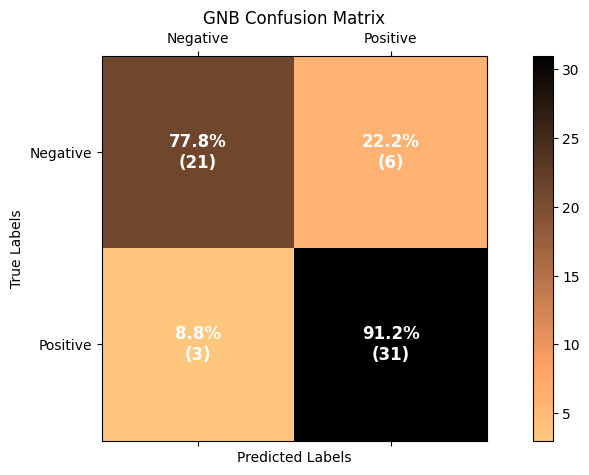

In [30]:
conf_mat = confusion_matrix(Y_test, Y_pred_gnb)

# Normalize for percentage annotations
conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

# Confusion matrix plotting function
def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both count and percentage
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('GNB Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="GNBcrr.png")


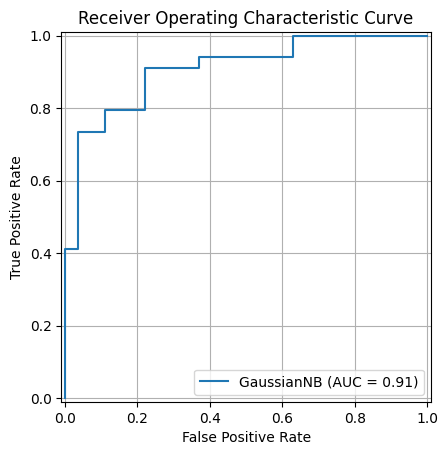

In [31]:
RocCurveDisplay.from_estimator(gnb, X_test, Y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("GNB.png")
plt.show()


In [32]:
Y_pred_gnb = np.around(Y_pred_gnb)
print(metrics.classification_report(Y_test,Y_pred_gnb))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



5: Random Forest Classifier

In [33]:
max_accuracy = 0
for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)#best random num

90.16
323


In [34]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
Y_pred_rf.shape

(61,)

In [35]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

90.16

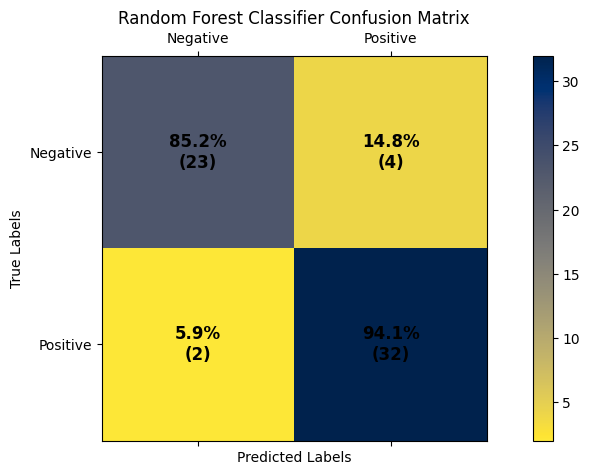

In [36]:
conf_mat = confusion_matrix(Y_test, Y_pred_rf)

conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='cividis_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both count and percentage
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='black', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Random Forest Classifier Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="RFcrr.png")

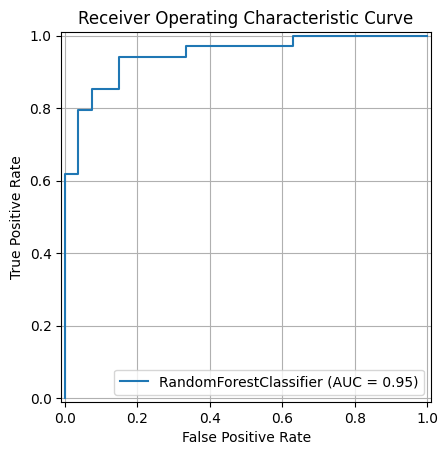

In [37]:
RocCurveDisplay.from_estimator(rf, X_test, Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("Rf.png")
plt.show()

In [38]:
Y_pred_rf = np.around(Y_pred_rf)
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.89      0.94      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



6: XGBoost

In [39]:
xgb= XGBClassifier(loss='exponential', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse',
                                  min_samples_split=2,
                                  min_samples_leaf=5, min_weight_fraction_leaf=0.2, max_depth=20, min_impurity_decrease=0.1,
                                  min_impurity_split=None,
                                  init=None, random_state=None, max_features=None, verbose=1, max_leaf_nodes=None, warm_start=False,
                                  presort='deprecated',
                                  validation_fraction=0.2, n_iter_no_change=None, tol=0.0002)

xgb.fit(X_train, Y_train)
Y_pred_xgb=xgb.predict(X_test)
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
score_xgb

78.69

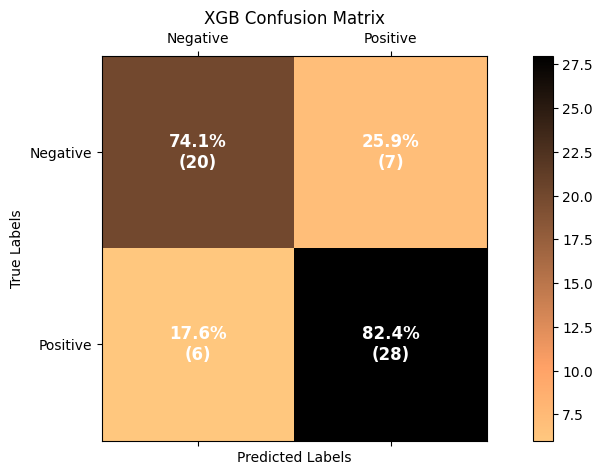

In [40]:
conf_mat = confusion_matrix(Y_test, Y_pred_xgb)

conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both count and percentage
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('XGB Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="XGBcrr.png")

In [41]:
Y_pred_xgb = np.around(Y_pred_xgb)
print(metrics.classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        27
           1       0.80      0.82      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



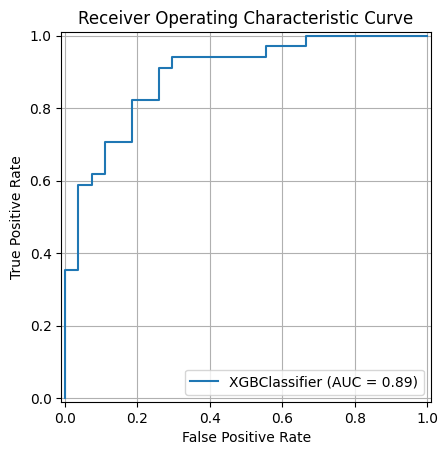

In [42]:
RocCurveDisplay.from_estimator(xgb, X_test, Y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("XGB.png")
plt.show()

7: Decision Tree Classifier

In [43]:
tclf = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='sqrt',
    random_state=46
)

# Train the model
tclf.fit(X_train, Y_train)

# Predict on test data
Y_pred_tclf = tclf.predict(X_test)

# Calculate accuracy
score_tclf = round(accuracy_score(Y_test, Y_pred_tclf) * 100, 2)
score_tclf


83.61

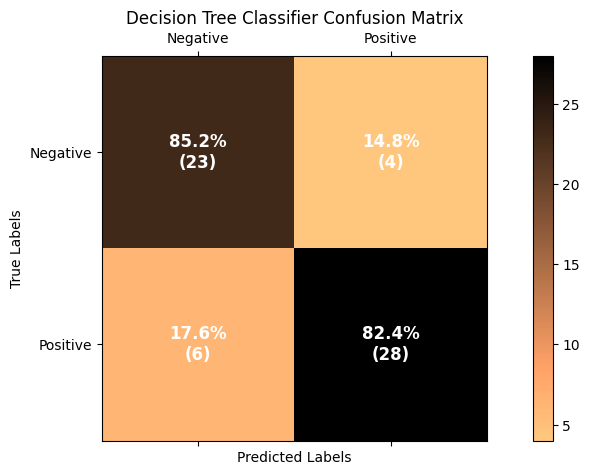

In [44]:

conf_mat = confusion_matrix(Y_test, Y_pred_tclf)

conf_mat_percent = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis] * 100

def plot_confusion_matrix(conf_mat, conf_mat_percent, class_names, figsize=(12, 5), cmap='copper_r', save_path=None):
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(conf_mat, cmap=cmap)
    fig.colorbar(cax)

    # Annotate with both count and percentage
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            percentage = conf_mat_percent[i, j]
            count = conf_mat[i, j]
            text = f"{percentage:.1f}%\n({count})"
            ax.text(j, i, text, ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Decision Tree Classifier Confusion Matrix')

    if save_path:
        plt.savefig(save_path)
    plt.show()

plot_confusion_matrix(conf_mat, conf_mat_percent, class_names=["Negative", "Positive"], save_path="DTCcrr.png")

In [45]:
Y_pred_tclf = np.around(Y_pred_tclf)
print(metrics.classification_report(Y_test,Y_pred_tclf))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



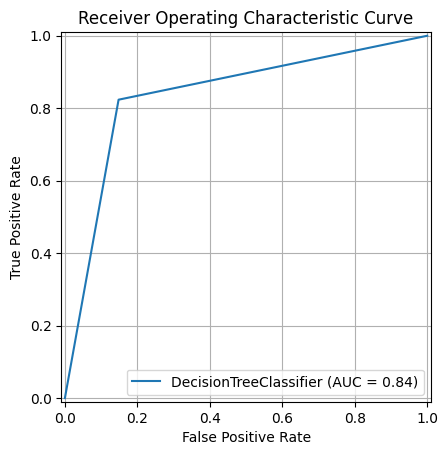

In [47]:
RocCurveDisplay.from_estimator(tclf, X_test, Y_test)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.grid(True)
plt.savefig("DTC.png")
plt.show()

**FINAL RESULTS**

In [48]:
scores = [score_lr,score_kclf,score_svm,score_gnb,score_rf,score_xgb,score_tclf]
Models = ["Logistic Regression","KNN CLF","Support Vector Machine","Gaussian Navie Bayes","Random Forest","XGBoost","Decision Tree"]

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using KNN CLF is: 68.85 %
The accuracy score achieved using Support Vector Machine is: 70.49 %
The accuracy score achieved using Gaussian Navie Bayes is: 85.25 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Decision Tree is: 83.61 %


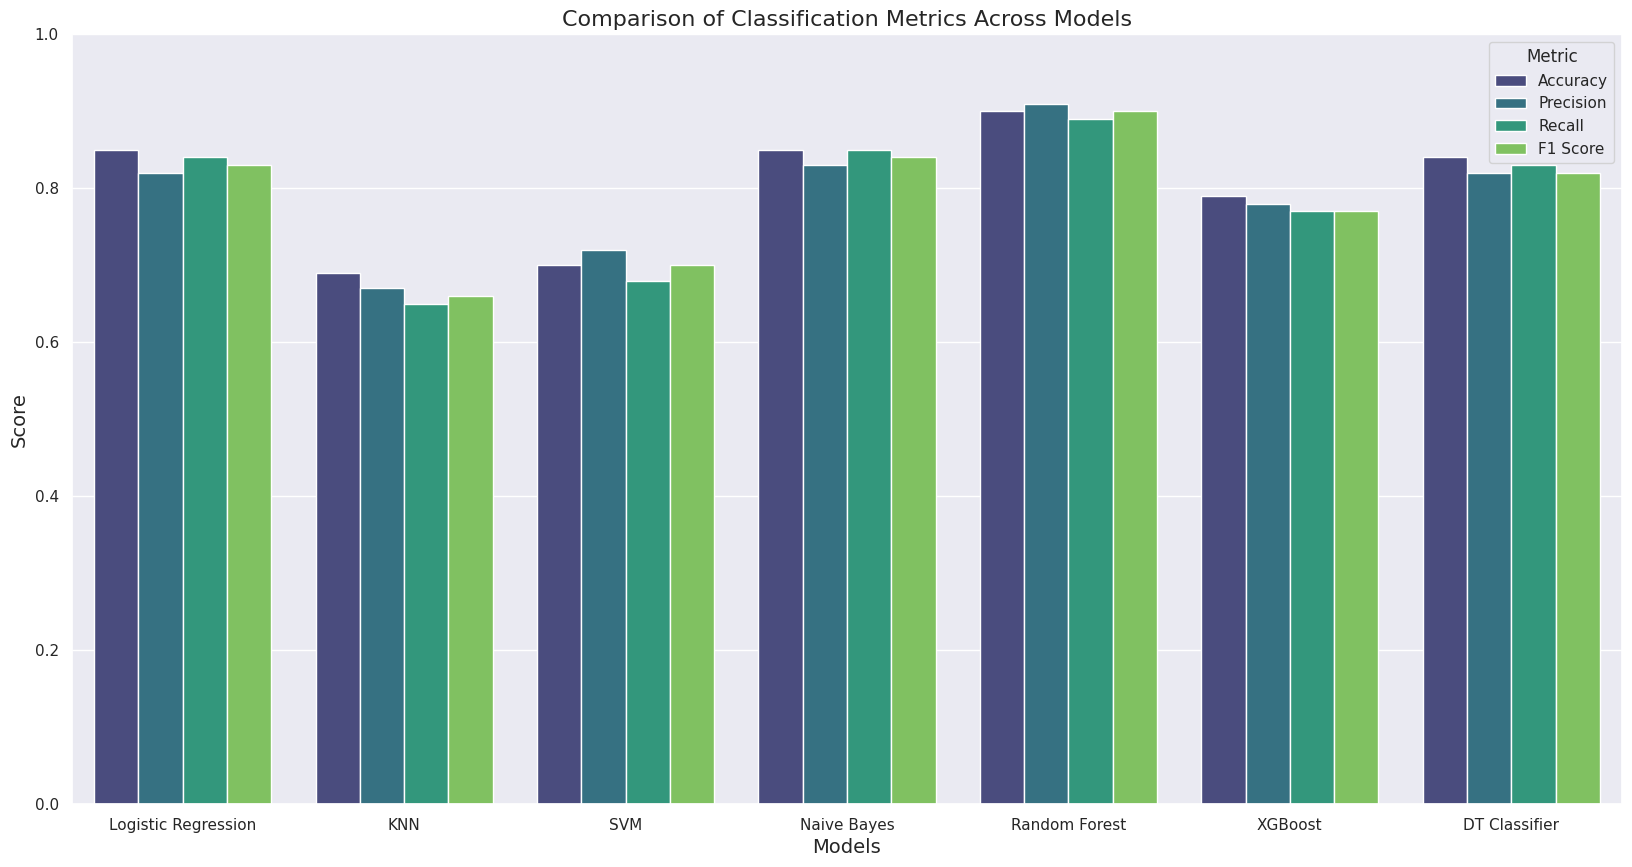

In [49]:
Models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Random Forest', 'XGBoost', 'DT Classifier']

accuracy = [0.85, 0.69, 0.70, 0.85, 0.90, 0.79, 0.84]
precision = [0.82, 0.67, 0.72, 0.83, 0.91, 0.78, 0.82]
recall = [0.84, 0.65, 0.68, 0.85, 0.89, 0.77, 0.83]
f1_score = [0.83, 0.66, 0.70, 0.84, 0.90, 0.77, 0.82]

df = pd.DataFrame({
    'Model': Models * 4,
    'Metric': ['Accuracy'] * 7 + ['Precision'] * 7 + ['Recall'] * 7 + ['F1 Score'] * 7,
    'Score': accuracy + precision + recall + f1_score
})

sns.set(style="darkgrid", rc={'figure.figsize': (20, 10)})

sns.barplot(data=df, x='Model', y='Score', hue='Metric', palette='viridis')

plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.title("Comparison of Classification Metrics Across Models", fontsize=16)
plt.ylim(0, 1)  # All scores should be between 0 and 1

plt.legend(title="Metric")

plt.savefig("ModelComparison_Metrics.png")

plt.show()



In [50]:
Input = (63, 1, 2,145,154,1,0,150, 0, 2.3,0,0,0)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease by %f "%(prediction))

[1]
The Person will has a Heart Disease by 1.000000 


In [52]:
Input = (40, 1, 1, 120, 180, 0, 0, 160, 0, 0.0, 1, 1, 3)

Input_array= np.asarray(Input)
Input_reshaped = Input_array.reshape(1,-1)

prediction = rf.predict(Input_reshaped)
prediction = np.around(prediction)

print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print("The Person will has a Heart Disease by %f "%(prediction))

[0]
The Person does not have a Heart Disease
